# WeatherPy

#### Analysis
* The temperature increases as the latitude approaches the equator and decreases further away from the equator (latitude of equator is 0).

* As the latitude approaches the equatore, Humidity increases.

* As the latitude goes away from the equator, wind speed increases.

In [38]:
# Dependencies
import json
import requests
import random
import pandas as pd
import numpy as np
from citipy import citipy
import matplotlib.pyplot as plt
import seaborn as sns

# Import OpenWeatherMap API key.
from config import api_key

### Generate Cities List

In [39]:
# Build a list of cities
cities = []

# Create a list of random latitude, longitude values
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lats_lngs = zip(lats, lngs)

# Create a for loop to get cities by latitudes, longitudes
for lat, lon in lats_lngs:
    city_data = citipy.nearest_city(lat, lon)
    city = city_data.city_name
        
    if city not in cities:
        cities.append(city)
        
print(len(cities))

616


### Perform API Calls

In [40]:
# Weather check on each of the cities using a series of successive API calls.
print("Beginning Data Retrieval")
print("-" * 30)

target_url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

record = 1
cities_data = []
city_char = []

for city in cities:
    # To get city names without space
    for ch in city:
        city_nospace = city.replace(" ", "%20")
    city_char.append(city_nospace)
    
    url = target_url + 'units=' + units + '&APPID=' + api_key + '&q=' + city_nospace
    weather_response = requests.get(url)
    weather_json = weather_response.json()
    if (weather_json["cod"] == 200):
        city_cloudiness = weather_json["clouds"]["all"]
        country = weather_json["sys"]["country"]
        city_date = weather_json["dt"]
        city_humidity = weather_json["main"]["humidity"]
        city_lat = weather_json["coord"]["lat"]
        city_lng = weather_json["coord"]["lon"]
        city_max_temp = weather_json["main"]["temp_max"]
        city_wind_speed = weather_json["wind"]["speed"]
        
    # Append the list to a single dictionary for each parameter 
    cities_data.append({"City": city, 
                        "Cloudiness": city_cloudiness, 
                        "Country": country, 
                        "Date": city_date, 
                        "Humidity": city_humidity, 
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp, 
                        "Wind Speed": city_wind_speed})
    print("Processing Record {} | {}".format(record,city))
    print(url)
    record = record + 1 
    
print("-" * 30)
print("Data Retrieval Complete")
print("-" * 30)      
    


Beginning Data Retrieval
------------------------------
Processing Record 1 | farsund
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=farsund
Processing Record 2 | upernavik
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=upernavik
Processing Record 3 | kahului
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=kahului
Processing Record 4 | amderma
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=amderma
Processing Record 5 | okha
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=okha
Processing Record 6 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=attawapiskat
Processing Record 7 | kapaa
http://api.openweathermap.org/data/2.5/weather?units=imperial&

Processing Record 59 | chapais
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=chapais
Processing Record 60 | rio grande
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=rio%20grande
Processing Record 61 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=tasiilaq
Processing Record 62 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=ushuaia
Processing Record 63 | vardo
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=vardo
Processing Record 64 | craig
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=craig
Processing Record 65 | hilo
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=hilo
Processing

Processing Record 116 | oranjemund
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=oranjemund
Processing Record 117 | kutum
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=kutum
Processing Record 118 | andijon
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=andijon
Processing Record 119 | quixada
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=quixada
Processing Record 120 | dikson
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=dikson
Processing Record 121 | sitka
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=sitka
Processing Record 122 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=longye

Processing Record 172 | nefteyugansk
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=nefteyugansk
Processing Record 173 | umzimvubu
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=umzimvubu
Processing Record 174 | tessalit
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=tessalit
Processing Record 175 | chuy
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=chuy
Processing Record 176 | torbay
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=torbay
Processing Record 177 | cidreira
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=cidreira
Processing Record 178 | tchibanga
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4

Processing Record 230 | vagay
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=vagay
Processing Record 231 | saint anthony
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=saint%20anthony
Processing Record 232 | codrington
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=codrington
Processing Record 233 | sola
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=sola
Processing Record 234 | gwadar
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=gwadar
Processing Record 235 | lushunkou
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=lushunkou
Processing Record 236 | alice springs
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff

Processing Record 287 | almaznyy
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=almaznyy
Processing Record 288 | norden
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=norden
Processing Record 289 | jumla
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=jumla
Processing Record 290 | ijaki
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=ijaki
Processing Record 291 | hurghada
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=hurghada
Processing Record 292 | beringovskiy
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=beringovskiy
Processing Record 293 | mazara del vallo
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c

Processing Record 344 | opuwo
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=opuwo
Processing Record 345 | tel aviv-yafo
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=tel%20aviv-yafo
Processing Record 346 | kropotkin
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=kropotkin
Processing Record 347 | neustrelitz
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=neustrelitz
Processing Record 348 | bandarbeyla
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=bandarbeyla
Processing Record 349 | murdochville
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=murdochville
Processing Record 350 | ballina
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b

Processing Record 400 | alta floresta
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=alta%20floresta
Processing Record 401 | bilibino
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=bilibino
Processing Record 402 | sao joao da barra
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=sao%20joao%20da%20barra
Processing Record 403 | sondrio
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=sondrio
Processing Record 404 | ondorhaan
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=ondorhaan
Processing Record 405 | general roca
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=general%20roca
Processing Record 406 | nakur
http://api.openweathermap.org/data/2.5/weather?units=i

Processing Record 457 | solaro
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=solaro
Processing Record 458 | bontang
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=bontang
Processing Record 459 | panorama
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=panorama
Processing Record 460 | chitungwiza
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=chitungwiza
Processing Record 461 | sorland
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=sorland
Processing Record 462 | west odessa
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=west%20odessa
Processing Record 463 | kieta
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80

Processing Record 514 | shikarpur
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=shikarpur
Processing Record 515 | mayna
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=mayna
Processing Record 516 | inirida
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=inirida
Processing Record 517 | azle
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=azle
Processing Record 518 | praia
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=praia
Processing Record 519 | miraflores
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=miraflores
Processing Record 520 | taoudenni
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=taoudenni

Processing Record 571 | rio bueno
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=rio%20bueno
Processing Record 572 | fruitvale
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=fruitvale
Processing Record 573 | bacolod
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=bacolod
Processing Record 574 | kamenskoye
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=kamenskoye
Processing Record 575 | vao
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=vao
Processing Record 576 | upata
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=upata
Processing Record 577 | ipua
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=7b3dce35aaa126aed882dbff80b8c4dc&q=ipua
P

In [41]:
# Create a DataFrame with the information received 
cities_df = pd.DataFrame(cities_data)
cities_df.count()

City          616
Cloudiness    616
Country       616
Date          616
Humidity      616
Lat           616
Lng           616
Max Temp      616
Wind Speed    616
dtype: int64

In [42]:
# Display the city dataframe
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,farsund,0,NO,1519941794,100,58.09,6.80,19.41,19.19
1,upernavik,88,GL,1519941854,87,72.79,-56.15,23.14,9.13
2,kahului,40,US,1519937760,61,20.89,-156.47,80.60,14.99
3,amderma,40,US,1519937760,61,20.89,-156.47,80.60,14.99
4,okha,64,RU,1519941855,80,53.59,142.95,3.97,13.04


In [43]:
# Save the DataFrame as a csv
cities_df.to_csv("Output/weatherpy_data.csv", encoding="utf-8", index=False)

### Latitude vs. Temperature Plot

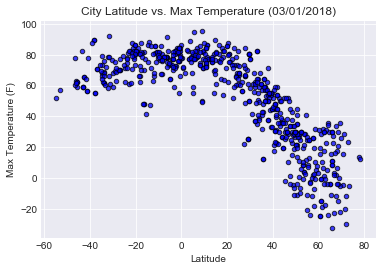

In [44]:
# Scatter plot City Latitude vs. Temperature
sns.set_style("darkgrid")
plt.scatter(cities_df["Lat"],cities_df["Max Temp"],color="blue", s=20, marker="o", 
            alpha=0.75, linewidths=1, edgecolor='black')
plt.title("City Latitude vs. Max Temperature (03/01/2018)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save the figure
plt.savefig("Output/lat_temperature.png")

# Show plot
plt.show()

### Latitude vs. Humidity Plot

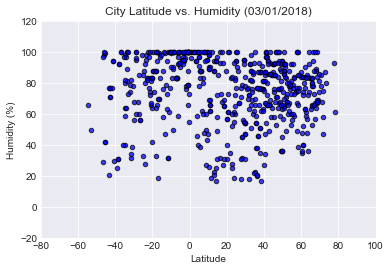

In [45]:
# Scatter plot City Latitude vs. Humidity
plt.scatter(cities_df["Lat"],cities_df["Humidity"],color="blue", s=20, marker="o", 
            alpha=0.75, linewidths=1, edgecolor='black')
plt.title("City Latitude vs. Humidity (03/01/2018)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.xlim([-80, 100])
plt.ylim([-20,120])

# Save the figure
plt.savefig("Output/lat_humidity.png")

# Show plot
plt.show()

### Latitude vs. Cloudiness Plot

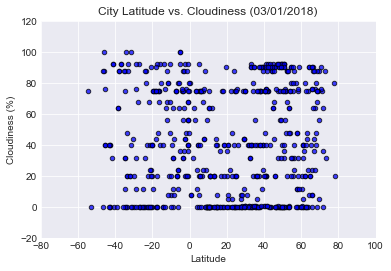

In [46]:
# Scatter plot City Latitude vs. Cloudiness
plt.scatter(cities_df["Lat"],cities_df["Cloudiness"],color="blue", s=20, marker="o", 
            alpha=0.75, linewidths=1, edgecolor='black')
plt.title("City Latitude vs. Cloudiness (03/01/2018)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.xlim([-80, 100])
plt.ylim([-20,120])

# Save the figure
plt.savefig("Output/lat_cloud.png")

# Show plot
plt.show()

### Latitude vs. Wind Speed Plot

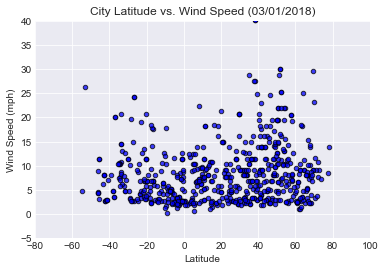

In [47]:
# Scatter plot City Latitude vs. Wind Speed
plt.scatter(cities_df["Lat"],cities_df["Wind Speed"],color="blue", s=20, marker="o", 
            alpha=0.75, linewidths=1, edgecolor='black')
plt.title("City Latitude vs. Wind Speed (03/01/2018)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.xlim([-80, 100])
plt.ylim([-5,40])

# Save the figure
plt.savefig("Output/lat_windspeed.png")

# Show plot
plt.show()